# Question 1

## (a)

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
"GRE/TOEFL score/LOR/SOP/research/CGPA are features that are related to predicting admit chance"
df = pd.read_csv('/Users/mac_1/Desktop/CHEM C142/Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [136]:
norm_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
for column in norm_columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.92
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.76
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.72
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.80
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,0.87
496,497,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,0.96
497,498,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,0.93
498,499,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,0.73


In [137]:
X = df.drop(columns=['Chance of Admit'] and ['Serial No.']).values  # Convert to numpy array
y = df['Chance of Admit'].values  # Convert to numpy array
y = np.array(y)

In [115]:
X

array([[0.94      , 0.92857143, 0.75      , ..., 0.91346154, 1.        ,
        0.92      ],
       [0.68      , 0.53571429, 0.75      , ..., 0.66346154, 1.        ,
        0.76      ],
       [0.52      , 0.42857143, 0.5       , ..., 0.38461538, 1.        ,
        0.72      ],
       ...,
       [0.8       , 1.        , 1.        , ..., 0.88461538, 1.        ,
        0.93      ],
       [0.44      , 0.39285714, 0.75      , ..., 0.5224359 , 0.        ,
        0.73      ],
       [0.74      , 0.75      , 0.75      , ..., 0.71794872, 0.        ,
        0.84      ]])

## (b)

**If you want, you can read the following material to help you with the code!**

Let's denote $a$ as the output of our simple perceptron model.

$$ \mathbf{a} = \sigma(\mathbf{z}) = \sigma(\mathbf{Xw+b}) $$

where $X\in \mathbb{R}^{N_{bz}\times N_f}$ is the input data, $N_{bz}$ is the batch size (i.e. number of samples in one calculation) and $N_f$ is the dimension of input features. $\mathbf{w}\in \mathbb{R}^{N_f\times N_o}$ is the weights matrix and $\mathbf{b}\in \mathbb{R}^{N_o}$ is the biases. $N_o$ is the dimension of outputs. $\sigma$ is the activation function.

The loss function is defined as half of the mean squared error (MSE) bewteen predicted values $\mathbf{a}$ and the ground truth $\mathbf{O}$:

$$ C = \frac{1}{2}\mathrm{MSE}(\mathbf{a, O}) = \frac{1}{2N_{bz}N_o}\sum_{m}^{N_{bz}}\sum_{i}^{N_o}(a_{mi}-O_{mi})^2$$

Using the chain rule to calculate the gradient of weights and biases. First define

$$ \boldsymbol{\delta} = \frac{\partial C}{\partial \mathbf{z}} = \frac{\partial C}{\partial \mathbf{a}}\odot \sigma'(z) = \frac{1}{N_{bz}N_o}(\mathbf{a}-\mathbf{O})\odot\sigma'(\mathbf{z})$$

where $\odot$ is elementwise product.

$$ \frac{\partial C}{\partial \mathbf{w}} =  \mathbf{X}^T\frac{\partial C}{\partial \mathbf{z}} = \mathbf{X}^T\boldsymbol{\delta}$$

$$ \frac{\partial C}{\partial \mathbf{b}} =  \sum_{m}^{N_{bz}}\boldsymbol{\delta}_m$$

where $\boldsymbol{\delta}_m$ is the $m$-th row of matrix $\boldsymbol{\delta}$.

In [118]:
class SimplePerceptron():
    """
    Implementation of simple perceptron regressor
    """
    def __init__(
        self, 
        input_dim, 
        output_dim, 
        learning_rate=0.00001,
        activation=lambda x: x,
        activation_grad=lambda x: 1
    ):
        """
        Initialize a simple perceptron regressor
        
        Parameters
        ----------
        input_dim: int
            Input dimension
        output_dim: int
            Output dimension
        learning_rate: float
            Learning Rate
        activation: Callable
            Activation function
        activation_grad: Callable
            Activation function's first derivative
        """
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.activation = activation
        self.activation_grad = activation_grad
        self.lr = learning_rate
        self.weights = np.random.rand(input_dim,output_dim)
        self.biases = np.random.rand(output_dim)

    def predict(self, X):
        """
        Get predicted values of given input
        
        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        
        Returns
        -------
        y: numpy.ndarray
            Output, shape (n_samples, output_dim)
        """
        # Convert rank-1 array to rank-2
        if len(X.shape) == 1:
            X = X.reshape((-1, 1))
        
        # Check that the dimension of accepted input data is the same as expected
        dim = X.shape[1]
        if dim != self.input_dim:
            raise Exception(f"Expected input size {self.input_dim}, accepted {dim}")
        
        self.z =np.dot(X,self.weights)+self.biases
        self.a = self.activation(self.z)
        return self.a

    def fit(self, X, y):
        """
        Fit the model by performing a steepest descent step

        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        y: numpy.ndarray
            Labels, shape (n_samples, output_dim)
        """        
        self.predict(X)

        # Compute error
        error = self.a - y

        # Compute delta (error derivative with respect to weighted sum)
        delta = error * self.activation_grad(self.z) / y.size

        # Compute gradients
        weights_grad = np.dot(X.T, delta)
        bias_grad = np.sum(delta, axis=0)

        # Update weights and biases
        self.weights -= self.lr * weights_grad
        self.biases -= self.lr * bias_grad
        

        
    def train_one_epoch(self, X, y, batch_size=32):
        """
        Train the model for one epoch
        
        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        y: numpy.ndarray
            Labels, shape (n_samples, output_dim)
        batch_size: int
            Batch size
        """
        if len(X.shape) == 1:
            X = X.reshape((-1, 1))
        if len(y.shape) == 1:
            y = y.reshape((-1, 1))
            
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        for i in range(0, X.shape[0], batch_size):
            batch = indices[i: i+batch_size]
            self.fit(X[batch], y[batch])

    def evaluate(self, X, y):
        """
        Get the loss function with given data
        
        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        y: numpy.ndarray
            Labels, shape (n_samples, output_dim)
        
        Returns
        -------
        L: float
            Loss function value.
        """
        # Transform the single-sample data into 2-dimensional, for the convenience of matrix multiplication
        if len(X.shape) == 1:
            X = X.reshape((-1, 1))
        if len(y.shape) == 1:
            y = y.reshape((-1, 1))
            
        y_pred = self.predict(X)
        # mean squared error
        return np.mean((y_pred - y) ** 2)
    
    def get_weights(self):
        """
        Get weights and biases
        """
        return self.weights.copy(), self.biases.copy()
    
    def set_weights(self, weights, biases):
        """
        Set weights and biases
        """
        self.weights = weights
        self.biases = biases

## (c)

Here, we will do the following things:

+ Split the data to $k$-folds, use the $k-1$ folds for training and the other fold for testing
+ In each fold, further split the training data ($k-1$ folds of the whole dataset) by 80\%/20\%. Use the 80\% to train the model in certain epochs and use the 20\% as a validation set to determine the best model during training.
+ For each fold, plot the validation loss against training
+ For each fold, report the mean squared error of the total training set (the $k-1$ fold data) and the test set (the other fold data)  

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split

def k_fold_cross_validation(k, X, y, epochs, learning_rate=0.0001, activation=lambda x: x, activation_grad=lambda x: 1):
    # Check if the number of samples is sufficient for k-fold cross-validation
    if len(X) < k:
        raise ValueError("Number of samples is less than the specified number of folds for cross-validation.")
    
    kf = KFold(n_splits=k)
    train_mse_list, test_mse_list = [], []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Further split the training data into train and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        # Train the model
        model = SimplePerceptron(
            input_dim=X_train.shape[1],
            output_dim=1, 
            learning_rate=learning_rate,
            activation=activation,
            activation_grad=activation_grad
        )

        train_losses, val_losses = [], []
        for epoch in range(epochs):
            model.train_one_epoch(X_train, y_train)
            train_loss = model.evaluate(X_train, y_train)
            val_loss = model.evaluate(X_val, y_val)
            train_losses.append(train_loss)
            val_losses.append(val_loss)

        # Plot validation loss against training
        plt.plot(range(epochs), np.log10(val_losses), label='Validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Log Loss')
        plt.legend()
        plt.title('Validation Loss vs. Training Epochs')
        plt.show()

        # Report mean squared error on training and test sets
        train_mse = model.evaluate(X_train, y_train)
        test_mse = model.evaluate(X_test, y_test)
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)

    # Report average mean squared error over all folds
    print("Average Training MSE:", np.mean(train_mse_list))
    print("Average Test MSE:", np.mean(test_mse_list))

# Call the function with your data
k_fold_cross_validation(5, X_noGRE, y, 100)


IndexError: index 183 is out of bounds for axis 0 with size 183

In [167]:
from sklearn.model_selection import train_test_split, KFold


def KFoldCrossValidation(
    k, X, y, epochs, draw_curve=True, learning_rate=0.0001, 
    activation=lambda x: x, activation_grad=lambda x: 1,
    verbose=True
):
    """
    K-Fold Validation
    
    Parameters
    ---------
    k: int
        The number of fold in validation
    X: numpy.ndarray
        Input samples, shape (n_samples, input_dim)
    y: numpy.ndarray
        Labels, shape (n_samples, output_dim)
    epochs: int
        Number of training epochs
    draw_curve: bool
        Whether to draw the validation loss against training steps
    learning_rate: float
        Learning rate
    activation: Callable
        Activation function
    activation_grad: Callable
        Gradient of activate function
    verbose: bool
        Whether to print information
    
    Returns
    ------
    model: list
        List of k models
    """
    # Reshape the X,y if they are rank-1
    if len(X.shape) == 1:
        X = X.reshape((-1, 1))
    if len(y.shape) == 1:
        y = y.reshape((-1, 1))
    input_dim = X.shape[1]
    output_dim = y.shape[1]
    
    # do a 5-fold validation
    kf = KFold(n_splits=k, shuffle=True)
    
    if draw_curve:
        n_row, n_col = int(np.ceil(k / 3)), 3
        fig, axes = plt.subplots(n_row, n_col, figsize=(5 * n_col, 5 * n_row), constrained_layout=True)
        axes = axes.flatten()
    
    models = []
    train_err_list, test_err_list = [], []
    for i, (train_selector, val_selector) in enumerate(kf.split(X)):
        # Decide training examples and testing examples for this fold
        X_train, X_test = X[train_selector], X[val_selector]
        y_train, y_test = y[train_selector], y[val_selector]
        
        # define your models here
        model = SimplePerceptron(
            input_dim=input_dim,
            output_dim=output_dim,
            learning_rate=learning_rate,
            activation=activation,
            activation_grad=activation_grad
        )
        
        # further split the X_train by 80%/20%
        # use train_test_split function in sklearn
        X_train_in, X_val, y_train_in, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42)
        
        lowest_val_err = np.inf
        val_err_list = []
        for _ in range(epochs):
            # Train model on a number of epochs, and test performance in the validation set
            model.train_one_epoch(X_train_in, y_train_in)
            val_err = model.evaluate(X_val, y_val)
            val_err_list.append(val_err)
            if val_err < lowest_val_err:
                lowest_val_err = val_err
                weights, biases = model.get_weights()

        # The final number of epochs is when the minimum error in validation set occurs    
        if verbose:
            print("Number of epochs with lowest validation:", np.argmin(val_err_list))
        model.set_weights(weights, biases)
        models.append(model)

        # Report MSE on X_train and X_test
        train_err = model.evaluate(X_train, y_train)
        train_err_list.append(train_err)
        test_err = model.evaluate(X_test, y_test)
        test_err_list.append(test_err)
        
        if draw_curve:
            axes[i].plot(np.arange(epochs), np.log10(val_err_list), label='Validation loss')
            axes[i].set_xlabel('Epochs')
            axes[i].set_ylabel('Log Loss')
            axes[i].legend()
            axes[i].set_title(f"Epoch {i}")
    
    if verbose:      
        print("Final results:")
        print(f"Training error: {np.mean(train_err_list)}+/-{np.std(train_err_list)}")
        print(f"Testing error: {np.mean(test_err_list)}+/-{np.std(test_err_list)}")
    
    return models


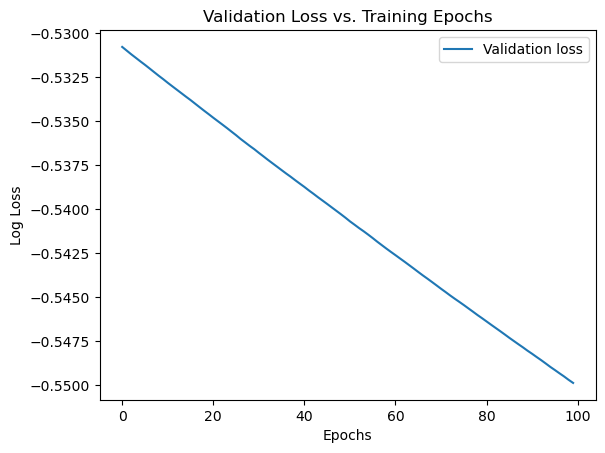

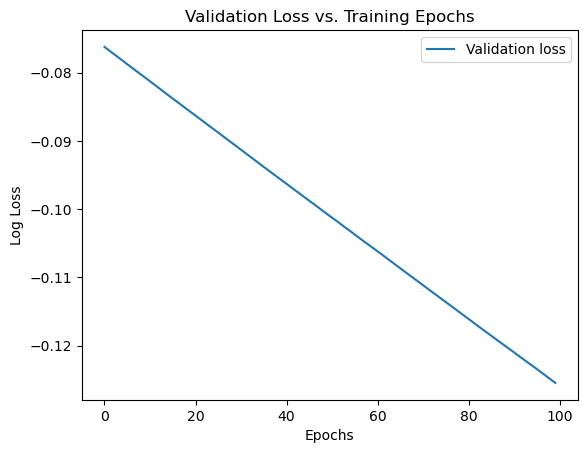

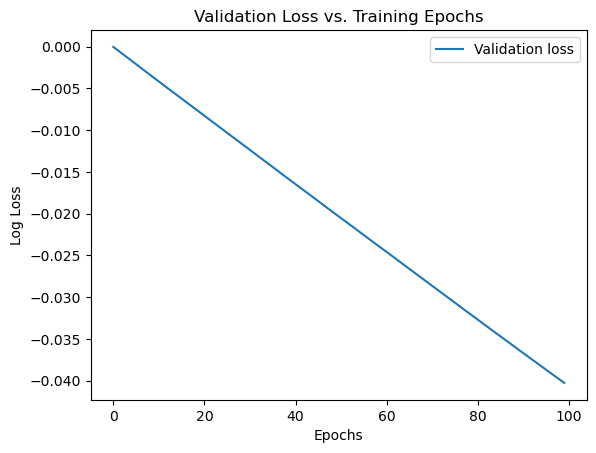

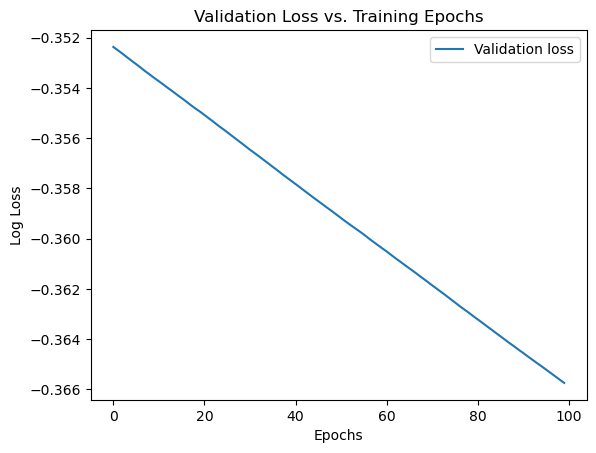

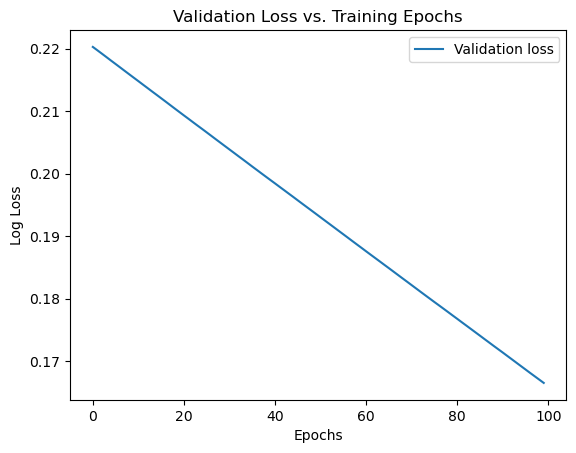

Average Training MSE: 0.8316014734272509
Average Test MSE: 0.8686863193455101


In [168]:
k_fold_cross_validation(5, X, y,100)

Number of epochs with lowest validation: 99
Number of epochs with lowest validation: 99
Number of epochs with lowest validation: 99
Number of epochs with lowest validation: 99
Number of epochs with lowest validation: 99
Final results:
Training error: 1.2192608514862913+/-0.7371620495610067
Testing error: 1.1364884088481508+/-0.6945490727269975


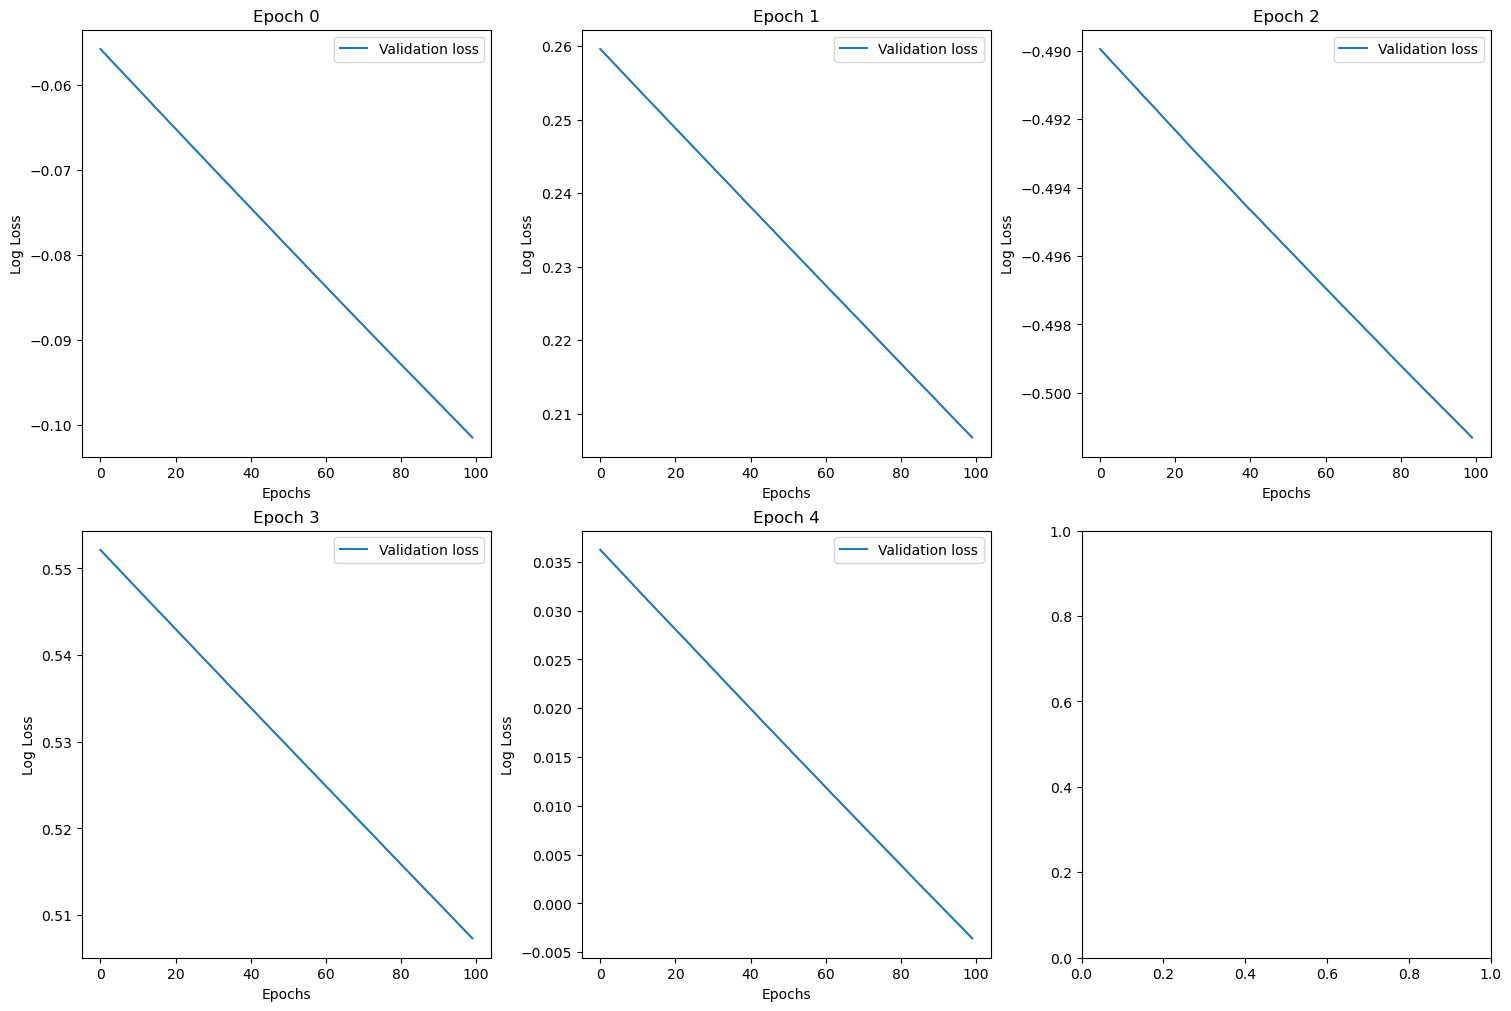

In [169]:
KFoldCrossValidation(5,X,y,100)

In [178]:
X_noGRE = df.drop(columns=['Chance of Admit','Serial No.','GRE Score']).values
X_noGRE.shape
df.shape

(500, 9)

IndexError: index 183 is out of bounds for axis 0 with size 183

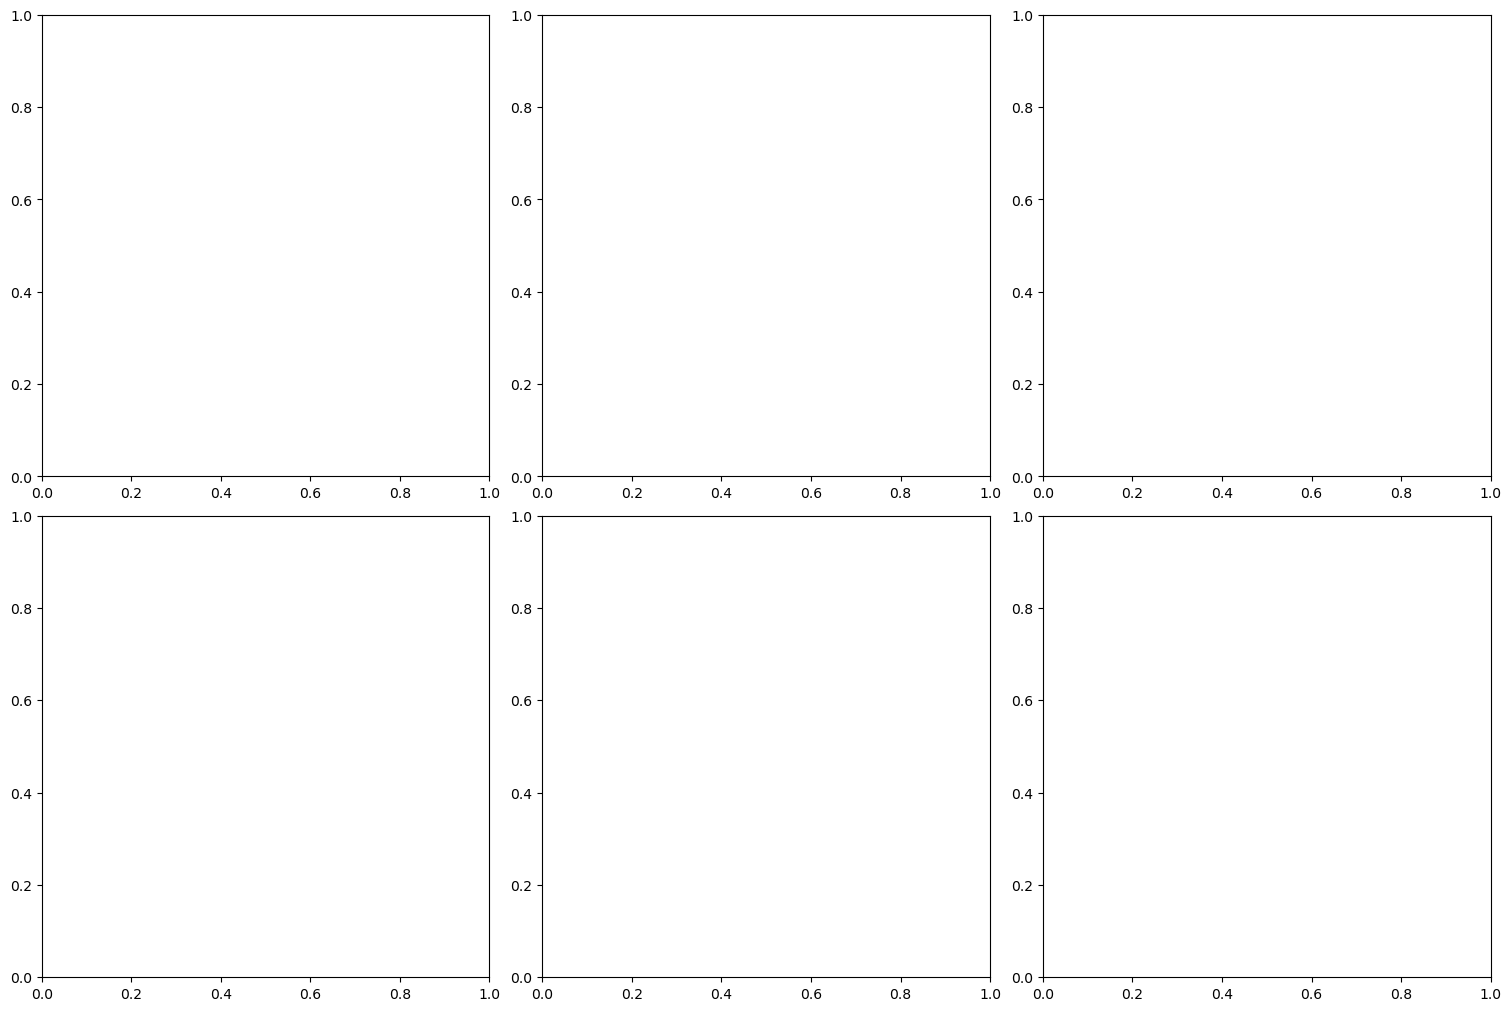

In [172]:
KFoldCrossValidation(5, X_noGRE, y,100)

Training error without GRE information is much larger than that with the information. It seems GRE score is importatnt. 

# Question 2

## (a)

*Hint: Think about what activation function in the SimplePerceptron model should be used to perform a logistic regression?*

One-dimension logistic regression expression:

$$ y = \frac{1}{1+e^{-(ax+b)}} $$

In [156]:
import pandas as pd

dataframe = pd.read_csv('/Users/mac_1/Desktop/CHEM C142/titanic.csv')

# Drop rows with missing values
dataframe = dataframe.dropna()

# Drop unnecessary columns
dataframe = dataframe.drop(columns=['Name', 'Ticket', 'Fare', 'Embarked', 'Cabin', 'PassengerId'])

# Perform one-hot encoding on the 'Sex' column
dataframe = pd.get_dummies(dataframe, columns=['Sex'])

X = dataframe.drop(columns=['Survived']).values  # Features
y = dataframe['Survived'].values  # Target


from sklearn.preprocessing import MinMaxScaler




# Normalize the feature variables using Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Now X_normalized contains the normalized feature variables, and y contains the target variable

X = X_normalized

## (b)

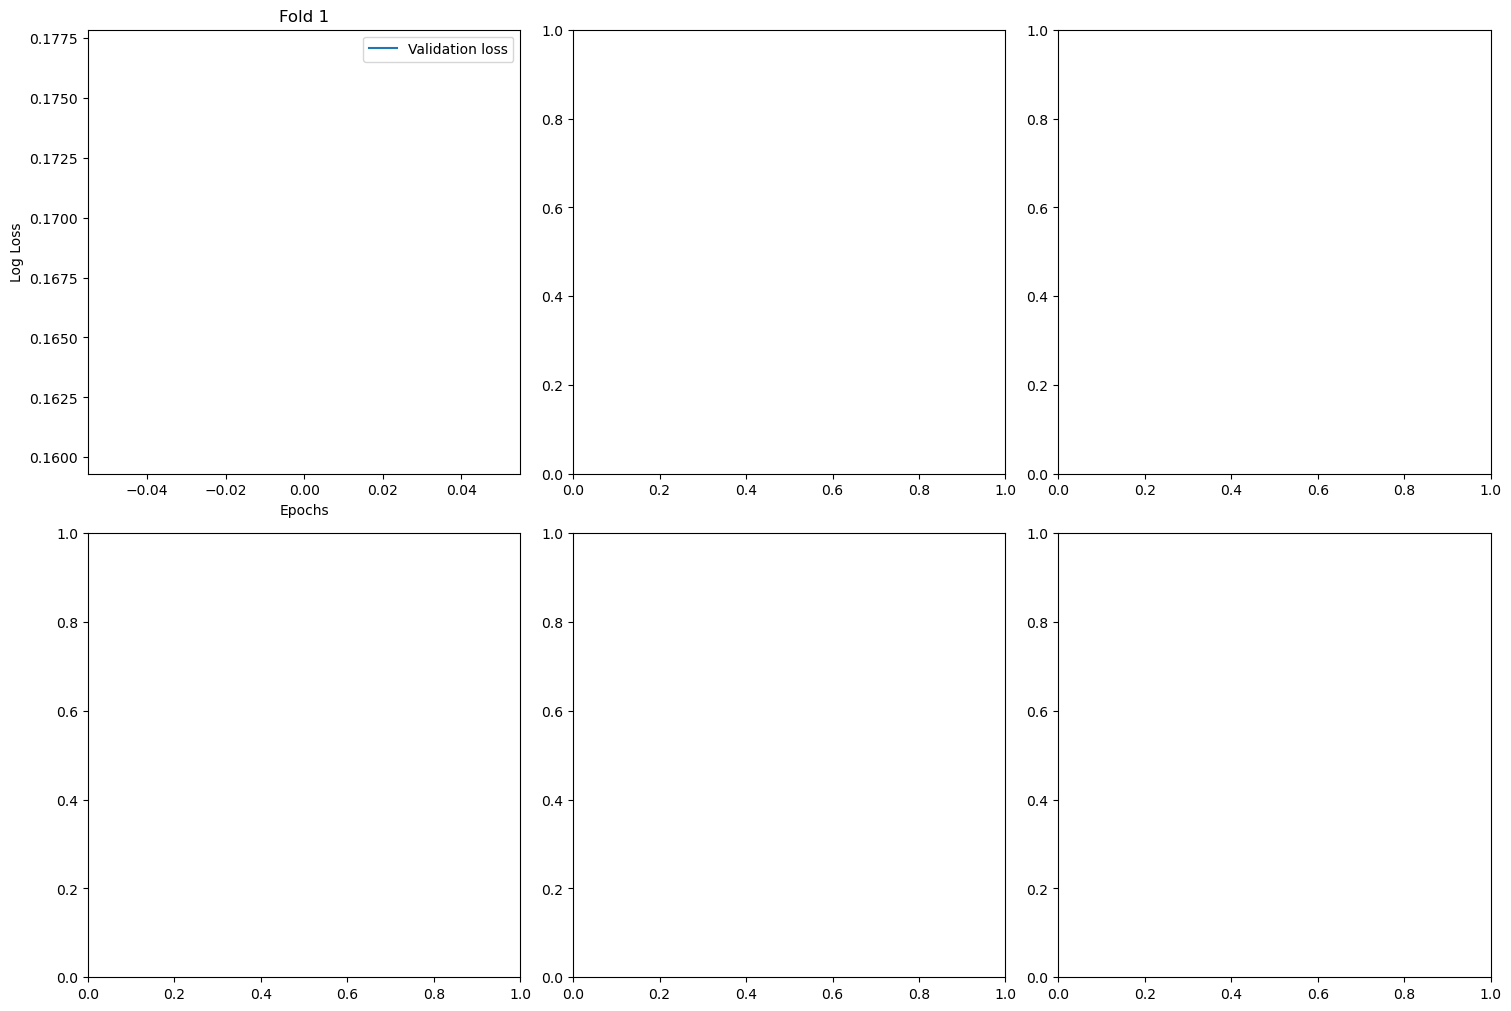

Number of epochs with lowest validation: 99
Number of epochs with lowest validation: 99
Number of epochs with lowest validation: 99
Number of epochs with lowest validation: 99
Number of epochs with lowest validation: 99
Final results:
Training error: 1.5295065807896455+/-0.5078667820174676
Testing error: 1.5827389032423997+/-0.7171576631269646


In [157]:
KFoldCrossValidation(5, X, y,100)

# Question 3

## (a)

**Note**: `KFoldCrossValidation` returns a model list, just pick any one of them (for example, the first) for prediction on test dataset.

In [81]:
def generate_X(number, boundary):
    x = (np.random.random(number) * 2 - 1) * boundary
    return x
    
def generate_data(number, stochasticity=0.2):
    x = generate_X(number, 10)
    ratio = generate_X(number, stochasticity) + 1
    y = 3 * np.sin(x) * ratio + 5
    return x, y

In [83]:
def show_correlation(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    r = [
        np.min([np.min(y_pred), np.min(y_true)]), 
        np.max([np.max(y_pred), np.max(y_true)])
    ]
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    plt.scatter(y_pred, y_true, s=5)
    ax.plot(r, r, color='red')
    ax.set_xlabel("Predictions")
    ax.set_ylabel("Ground truth")
    corr = np.corrcoef([y_pred, y_true])[1, 0]
    print("Correlation coefficient:", corr)

def show_plot(x, y_true, y_pred=None):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    ax.scatter(x, y_true, s=0.5, label='Ground Truth')
    if y_pred is not None:
        ax.scatter(x, y_pred, s=0.5, label="Predicted")
    ax.legend()

In [90]:
randData = generate_data(5000)
randData.shape()

AttributeError: 'tuple' object has no attribute 'shape'

## (b)

In [ ]:
from sklearn.neural_network import MLPRegressor


def KFoldCrossValidationMLP(
    k, X, y, epochs, 
    learning_rate=0.01, 
    activation='tanh',
    hidden_layers=(8,),
    verbose=True
):
    """
    K-Fold Validation for MLPRegressor
    
    Parameters
    ---------
    k: int
        The number of fold in validation
    X: numpy.ndarray
        Input samples, shape (n_samples, input_dim)
    y: numpy.ndarray
        Labels, shape (n_samples, output_dim)
    epochs: int
        Number of training epochs
    kwargs: keyword arguments
        Arguments to init a SimplePerceptron model. i.e. learning_rate, activation, activation_grad
    
    Returns
    ------
    model: SimplePerceptron
        The best model
    """
    # MLPRegressor takes 2D array for features
    # and 1D array for labels if the dimension of output is 1
    X = X.reshape(-1, 1) if len(X.shape) == 1

    # do a 5-fold validation
    kf = KFold(n_splits=k, shuffle=True)
    
    models = []
    train_err_list, test_err_list = [], []
    for i, (train_selector, val_selector) in enumerate(kf.split(np.arange(X.shape[0]))):
        # Decide training examples and testing examples for this fold
        X_train, X_test = X[train_selector], X[val_selector]
        y_train, y_test = y[train_selector], y[val_selector]
        
        model = MLPRegressor(
            max_iter=epochs,
            activation=activation, 
            learning_rate_init=learning_rate,
            hidden_layer_sizes=hidden_layers,
            early_stopping=True, validation_fraction=0.2, learning_rate='constant', 
        )
        model.fit(X_train, y_train)
        models.append(model)

        # Report MSE on X_train and X_test
        y_train_pred = model.predict(X_train)
        train_err = mse(y_train_pred, y_train)
        train_err_list.append(train_err)
        
        y_test_pred = model.predict(X_test)
        test_err = mse(y_test_pred, y_test)
        test_err_list.append(test_err)
        if verbose:
            print(f"Train error: {train_err}, Test error: {test_err}")
        
    
    if verbose:      
        print("Final results:")
        print(f"Training error: {np.mean(train_err_list)}+/-{np.std(train_err_list)}")
        print(f"Testing error: {np.mean(test_err_list)}+/-{np.std(test_err_list)}")
    
    return models[np.argmin(test_err_list)]

## (c)